# 連結型クラスタリング

凝集型の階層的クラスタリングの一種。

$$
\begin{eqnarray}
SSD(C_1) &=& \displaystyle \sum_{\boldsymbol{x}^{(i)} \in C_1} \left( \boldsymbol{x}^{(i)} - \overline{\boldsymbol{x}}_{C_1} \right)^2 \\
SSD(C_2) &=& \displaystyle \sum_{\boldsymbol{x}^{(i)} \in C_2} \left( \boldsymbol{x}^{(i)} - \overline{\boldsymbol{x}}_{C_2} \right)^2
\end{eqnarray}
$$

$$
SSD(C_1 \cup C_2) = \displaystyle \sum_{\boldsymbol{x}^{(i)} \in C_1 \cup C_2} \left( \boldsymbol{x}^{(i)} - \overline{\boldsymbol{x}}_{C_1 \cup C_2} \right)^2
$$

$$
SSD(C_1 \cup C_2) - SSD(C_1) - SSD(C_2)
$$


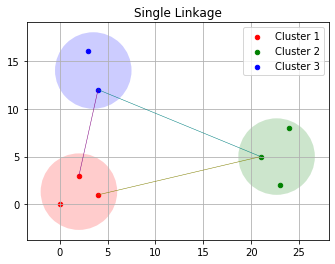

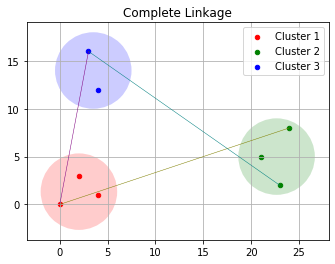

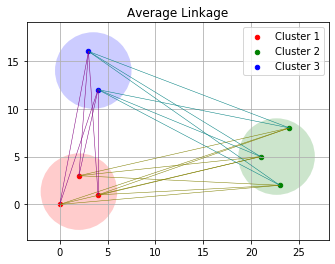

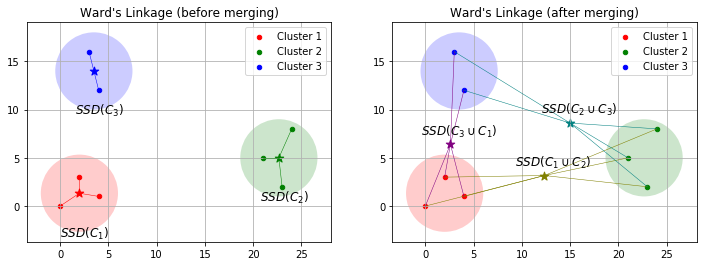

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import patches
import numpy as np

data = np.array([
    [0, 0],
    [2, 3],
    [4, 1],
    [21, 5],
    [23, 2],
    [24, 8],
    [3, 16],
    [4, 12]
])
x, y = data[:, 0], data[:, 1]
ids_cl = [range(3), range(3,6), range(6,8)]
g = np.array([
    np.average(data[:3], axis=0),
    np.average(data[3:6], axis=0),
    np.average(data[6:], axis=0)
])


colors = ['r', 'g', 'b']
line_colors = [[0.5,0.5,0], [0, 0.5,0.5], [0.5,0,0.5]]
def plot_point(ax):
    for c in range(3):
        circle = patches.Circle(xy=(g[c][0], g[c][1]), radius=4, fc=colors[c], alpha=0.2)
        ax.add_patch(circle)
    ax.scatter(x[:3], y[:3], s=20, c=colors[0], label='Cluster 1')
    ax.scatter(x[3:6], y[3:6], s=20, c=colors[1], label='Cluster 2')
    ax.scatter(x[6:], y[6:], s=20, c=colors[2], label='Cluster 3')
    ax.legend()
    ax.grid()

# 単連結法
ax = plt.subplot()
ax.set_aspect('equal')
plt.title('Single Linkage')
plot_point(ax)
plt.plot(x[[2,3]], y[[2,3]], c=line_colors[0], linewidth=0.5)
plt.plot(x[[3,7]], y[[3,7]], c=line_colors[1], linewidth=0.5)
plt.plot(x[[7,1]], y[[7,1]], c=line_colors[2], linewidth=0.5)
plt.show()

# 完全連結法
ax = plt.subplot()
ax.set_aspect('equal')
plt.title('Complete Linkage')
plot_point(ax)
plt.plot(x[[0,5]], y[[0,5]], c=line_colors[0], linewidth=0.5)
plt.plot(x[[4,6]], y[[4,6]], c=line_colors[1], linewidth=0.5)
plt.plot(x[[6,0]], y[[6,0]], c=line_colors[2], linewidth=0.5)
plt.show()

# 群平均法
ax = plt.subplot()
ax.set_aspect('equal')
plt.title('Average Linkage')
plot_point(ax)
for k, l in [[0, 1], [1, 2], [2, 0]]:
    color = line_colors[k]
    for i in ids_cl[k]:
        for j in ids_cl[l]:
            plt.plot([x[i], x[j]], [y[i], y[j]], c=color, linewidth=0.5)
plt.show()

# ウォード法
plt.figure(figsize=(12, 8))
ax=plt.subplot(1, 2, 1)
ax.set_aspect('equal')
plt.title('Ward\'s Linkage (before merging)')
plot_point(ax)
for c in range(3):
    plt.scatter(g[c][0], g[c][1], s=80, c=colors[c], marker='*')
for k, l in [[0, 1], [1, 2], [2, 0]]:
    color = colors[k]
    line_color = line_colors[k]
    g_merged = np.average(np.concatenate([data[ids_cl[k]], data[ids_cl[l]]]), axis=0)
    for i in ids_cl[k]:
        plt.plot([x[i], g[k][0]], [y[i], g[k][1]], c=color, linewidth=0.5)
for c in range(3):
    plt.text(g[c][0]-2, g[c][1]-4.5, '$SSD(C_{})$'.format(c+1), fontsize=12)
ax=plt.subplot(1, 2, 2)
ax.set_aspect('equal')
plt.title('Ward\'s Linkage (after merging)')
plot_point(ax)
"""
for k, l in [[0, 1], [1, 2], [2, 0]]:
    color = line_colors[k]
    g_merged = np.average(np.concatenate([data[ids_cl[k]], data[ids_cl[l]]]), axis=0)
    plt.scatter(g_merged[0], g_merged[1], s=80, color=color, marker='*')
    for i in ids_cl[k]:
        plt.plot([x[i], g_merged[0]], [y[i], g_merged[1]], c=color, linewidth=0.5)
    for i in ids_cl[l]:
        plt.plot([x[i], g_merged[0]], [y[i], g_merged[1]], c=color, linewidth=0.5)
    plt.text(g[c][0]-2, g[c][1]-4.5, '$SSD(C_{} \cup C_{})$'.format(c+1), fontsize=10)
"""
for c1 in range(3):
    c2 = (c1 + 1) % 3
    color = line_colors[c1]
    g_merged = np.average(np.concatenate([data[ids_cl[c1]], data[ids_cl[c2]]]), axis=0)
    plt.scatter(g_merged[0], g_merged[1], s=80, color=color, marker='*')
    for i in ids_cl[c1]:
        plt.plot([x[i], g_merged[0]], [y[i], g_merged[1]], c=color, linewidth=0.5)
    for i in ids_cl[c2]:
        plt.plot([x[i], g_merged[0]], [y[i], g_merged[1]], c=color, linewidth=0.5)
    plt.text(g_merged[0]-3, g_merged[1]+1, '$SSD(C_{} \cup C_{})$'.format(c1+1, c2+1), fontsize=12)
plt.show()

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

class HierarchyNode:
    def __init__(self, remoteness, size, left=None, right=None):
        self.remoteness = remoteness
        self.size = size
        self.left, self.right = left, right
    
class Cluster:
    def __init__(self, cluster_id, data_ids):
        self.cluster_id = cluster_id
        self.data_ids = data_ids

class LinkageClustering:
    MODE_SINGLE = 'single'
    MODE_COMPLETE = 'complete'
    MODE_AVERAGE = 'average'
    MODE_WARD = 'ward'
    
    def __init__(self, mode, k):
        """
        Parameters
        ----------
        mode : string
            - 単連結法 : 'single'
            - 完全連結法 : 'complete'
            - 群平均法 : 'average'
            - ウォード法 : 'ward'
        k : int
            クラスタがいくつになったら終了するか
        """
        self.k = k
        if mode == self.MODE_SINGLE:
            self.__calc_cluster_remoteness = self.__calc_dist_single
        elif mode == self.MODE_COMPLETE:
            self.__calc_cluster_remoteness = self.__calc_dist_complete
        elif mode == self.MODE_AVERAGE:
            self.__calc_cluster_remoteness = self.__calc_dist_average
        elif mode == self.MODE_WARD:
            self.__calc_cluster_remoteness = self.__calc_remoteness_ward
        else:
            raise Exception('Invalid mode: {}'.format(mode))

    def fit(self, data):
        """
        Parameters
        ----------
        data : numpy array
            クラスタリング対象のデータセット
        """
        n_data = len(data)
        
        self.hierarchy = [HierarchyNode(0, 1) for i in range(n_data)]
        
        # 距離行列の計算
        dist = np.zeros([n_data, n_data])
        for i in range(n_data):
            for j in range(i+1, n_data):
                d = np.sqrt(np.sum((data[i]-data[j])**2))
                dist[i][j] = d
                dist[j][i] = d
        # クラスタリングの実行
        n_cluster = n_data
        cluster_list = [Cluster(i, [i]) for i in range(n_cluster)]
        while n_cluster > 1:
            self.__merge(dist, cluster_list, data)
            n_cluster -= 1
            if n_cluster == self.k:
                self.cluster = np.zeros(n_data, dtype='int')
                for c in range(n_cluster):
                    self.cluster[cluster_list[c].data_ids] = c

    def __merge(self, dist, cluster_list, data):
        n_cluster = len(cluster_list)
        c1_merge, c2_merge = None, None
        remoteness_min = np.inf
        for c1 in range(n_cluster):
            for c2 in range(c1+1, n_cluster):
                r = self.__calc_cluster_remoteness(dist, cluster_list[c1].data_ids, cluster_list[c2].data_ids, data)
                if r < remoteness_min:
                    remoteness_min = r
                    c1_merge, c2_merge = c1, c2
        cluster_new = Cluster(len(self.hierarchy), cluster_list[c1_merge].data_ids + cluster_list[c2_merge].data_ids)
        self.hierarchy.append(HierarchyNode(remoteness_min, len(cluster_new.data_ids), cluster_list[c1_merge].cluster_id, cluster_list[c2_merge].cluster_id))
        cluster_list[c1_merge] = cluster_new
        cluster_list.pop(c2_merge)


    def __calc_dist_single(self, dist, ids_cl1, ids_cl2, data=None):
        """
        単連結法（最短距離法）
        """
        dist_min = np.inf
        for i in ids_cl1:
            for j in ids_cl2:
                if dist[i][j] < dist_min:
                    dist_min = dist[i][j]
        return dist_min
    
    def __calc_dist_complete(self, dist, ids_cl1, ids_cl2, data=None):
        """
        完全連結法（最長距離法）
        """
        dist_max = -np.inf
        for i in ids_cl1:
            for j in ids_cl2:
                if dist[i][j] > dist_max:
                    dist_max = dist[i][j]
        return dist_max
    
    def __calc_dist_average(self, dist, ids_cl1, ids_cl2, data=None):
        """
        群平均法
        """
        buff = []
        for i in ids_cl1:
            for j in ids_cl2:
                buff.append(dist[i][j])
        return np.average(buff)
    
    def __calc_remoteness_ward(self, dist, ids_cl1, ids_cl2, data):
        """
        ウォード法
        """
        data1, data2 = data[ids_cl1], data[ids_cl2]
        data_merged = np.concatenate([data1, data2])
        ave1, ave2, ave_merged = np.average(data1, axis=0), np.average(data2, axis=0), np.average(data_merged, axis=0)
        sse1, sse2, sse_merged = np.sum((data1-ave1)**2), np.sum((data2-ave2)**2), np.sum((data_merged-ave_merged)**2)
        return sse_merged - sse1 - sse2
    
    def draw_dendrogram(self):
        """
        樹形図を描画
        """
        i = len(self.hierarchy) - 1
        offset = 0
        while offset*2 < len(self.hierarchy):
            self.__dfs_dendrogram(i, offset)
            offset += self.hierarchy[i].size
            i -= 1
        plt.xlabel('Data Samples')
        plt.ylabel('Remoteness')
        plt.grid()
        
    def __dfs_dendrogram(self, i, offset):
        node = self.hierarchy[i]
        if node.left is None:
            return offset + 1
        node_left, node_right = self.hierarchy[node.left], self.hierarchy[node.right]
        x_left = self.__dfs_dendrogram(node.left, offset)
        x_right = self.__dfs_dendrogram(node.right, offset+node_left.size)
        x = [x_left, x_left, x_right, x_right]
        y = [node_left.remoteness, node.remoteness, node.remoteness, node_right.remoteness]
        plt.plot(x, y, c='black', linewidth=1)
        return (x_left + x_right) / 2

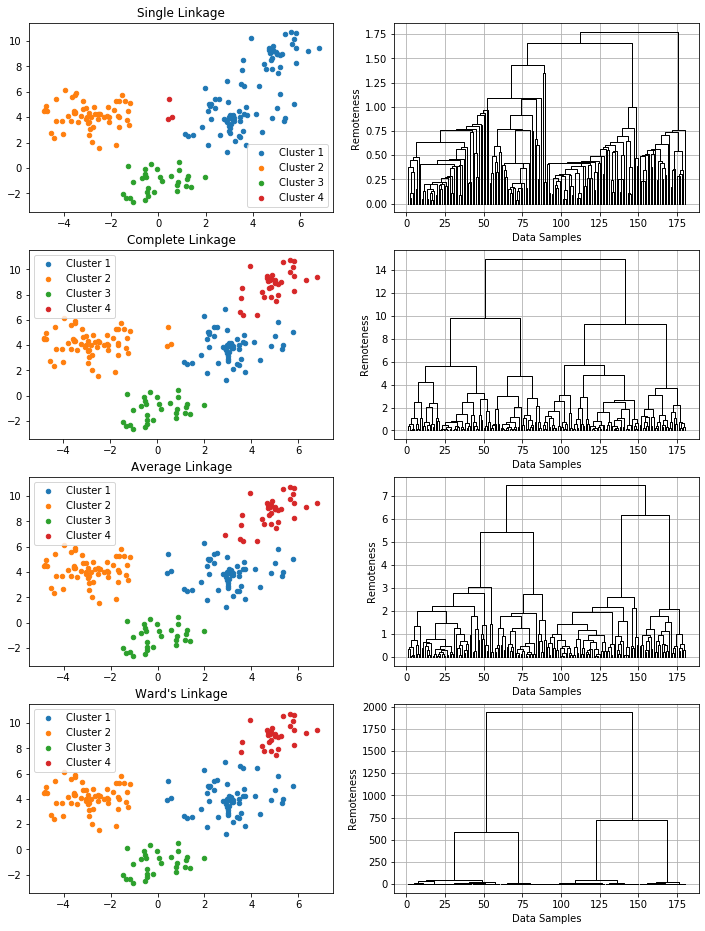

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def circle(c_, R_, n_):
    r = R_ * np.random.rand(n_)
    theta = np.random.rand(n_) * 2 * np.pi
    data = np.array([r * np.sin(theta) + c_[0], r * np.cos(theta) + c_[1]]).T
    return data

N = 180
data1 = circle([0, -1], 2, N//6)
data2 = circle([-3, 4], 2.5, N//3)
data3 = circle([3, 4], 3, N//3)
data4 = circle([5, 9], 2, N//6)
data = np.concatenate([data1, data2, data3, data4])
np.random.shuffle(data)

def plot(cl_, data_, title_):
    cl_unique = np.unique(cl_.cluster)
    plt.title(title_)
    for c in cl_unique:
        data_c = data_[np.where(cl_.cluster == c)[0]]
        plt.scatter(data_c[:, 0], data_c[:, 1], s=20, label='Cluster {}'.format(c+1))
    plt.legend()
plt.figure(figsize=(12, 16))

modes = ['single', 'complete', 'average', 'ward']
titles = ['Single Linkage', 'Complete Linkage', 'Average Linkage', 'Ward\'s Linkage']
for i in range(len(modes)):
    clustering = LinkageClustering(modes[i], 4)
    clustering.fit(data)
    plt.subplot(len(modes), 2, i*2+1)
    plot(clustering, data, titles[i])
    plt.subplot(len(modes), 2, i*2+2)
    clustering.draw_dendrogram()

plt.show()